In [4]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
# Green theme
px.defaults.color_continuous_scale = "Greens"
px.defaults.color_discrete_sequence = ["#27ae60", "#2ecc71", "#55efc4", "#95e1d3", "#5bab93", "#14532d", "#0f766e", "#064e3b"] 

In [5]:
# Load your dataset
df = pd.read_csv("D:\\nti\\final nti\\spotify.csv")  
#explore the data
df.head()


,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent


In [6]:
df.shape    

(85000, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          85000 non-null  object 
 1   track_name        84979 non-null  object 
 2   artist_name       85000 non-null  object 
 3   album_name        84954 non-null  object 
 4   release_date      85000 non-null  object 
 5   genre             85000 non-null  object 
 6   duration_ms       85000 non-null  int64  
 7   popularity        85000 non-null  int64  
 8   danceability      85000 non-null  float64
 9   energy            85000 non-null  float64
 10  key               85000 non-null  int64  
 11  loudness          85000 non-null  float64
 12  mode              85000 non-null  int64  
 13  instrumentalness  85000 non-null  float64
 14  tempo             85000 non-null  float64
 15  stream_count      85000 non-null  int64  
 16  country           85000 non-null  object

In [8]:
df.describe().round()

,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,explicit
count,85000.0,85000.0,85000.0,85000.0,85000.0,85000.0,85000.0,85000.0,85000.0,85000.0,85000.0
mean,254914.0,48.0,1.0,1.0,6.0,-28.0,1.0,0.0,130.0,214355.0,0.0
std,95300.0,15.0,0.0,0.0,3.0,16.0,1.0,0.0,40.0,1680637.0,0.0
min,90004.0,0.0,0.0,0.0,0.0,-55.0,0.0,0.0,60.0,1000.0,0.0
25%,171872.0,38.0,0.0,0.0,3.0,-41.0,0.0,0.0,95.0,1000.0,0.0
50%,254920.0,47.0,1.0,0.0,6.0,-28.0,1.0,0.0,130.0,2000.0,0.0
75%,337203.0,57.0,1.0,1.0,9.0,-14.0,1.0,1.0,165.0,9000.0,0.0
max,420000.0,100.0,1.0,1.0,11.0,-1.0,1.0,1.0,200.0,20000000.0,1.0


In [9]:
df.columns.to_list()

['track_id',
 'track_name',
 'artist_name',
 'album_name',
 'release_date',
 'genre',
 'duration_ms',
 'popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'instrumentalness',
 'tempo',
 'stream_count',
 'country',
 'explicit',
 'label']

In [10]:
#checking for null values
df.isnull().sum()

track_id             0
track_name          21
artist_name          0
album_name          46
release_date         0
genre                0
duration_ms          0
popularity           0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
instrumentalness     0
tempo                0
stream_count         0
country              0
explicit             0
label                0
dtype: int64

In [11]:
df[df["track_name"].isnull()]

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
3450,TRK-5F85D57B35D2,NaN,Joshua Mendoza,Sit dream,2024-08-20,EDM,317305,42,0.74,0.47,6,-33.19,0,0.405,123.45,1000,United States,0,Warner Music
13675,TRK-530AF3473134,NaN,Brenda Calderon,Offer despite,2019-02-27,Indie,159043,35,0.51,0.58,9,-48.51,0,0.415,67.81,1000,India,1,Sony Music
21451,TRK-224386735616,NaN,Jesse Carpenter,Right,2021-06-11,Country,269462,50,0.32,0.72,8,-26.73,0,0.604,115.88,1000,United Kingdom,0,Warner Music
24387,TRK-C14EC069CE8C,NaN,Kathryn Reed,Character onto,2017-03-15,Reggaeton,145197,44,0.09,0.51,3,-33.23,0,0.777,83.98,1000,Canada,0,Independent
29737,TRK-41E56A9B7D0F,NaN,Sara King,Material,2015-01-15,Indie,385848,71,0.40,0.53,7,-23.11,1,0.078,106.65,99000,France,0,Sony Music
34234,TRK-E813D431BEFF,NaN,Stephanie Villarreal,Receive,2019-09-20,R&B,271598,23,0.22,0.81,6,-36.35,0,0.716,77.10,1000,United States,0,Independent
35653,TRK-1D7E811646D5,NaN,Nicholas Dominguez,Significant,2019-07-14,Indie,135849,39,0.68,0.31,11,-27.62,1,0.640,82.50,50000,India,0,Island Records
38952,TRK-AE28B6340EF5,NaN,Sean Martin,Movement,2019-04-13,Classical,115179,35,0.15,0.99,7,-52.87,0,0.182,163.13,1000,Germany,0,Island Records
39043,TRK-3179046CDBBB,NaN,Patrick Rivers,Call,2015-09-14,Pop,239337,30,0.41,0.24,1,-14.09,1,0.231,176.79,1000,Australia,0,EMI
47946,TRK-04F201CCB2A2,NaN,Abigail Thomas,Quality police,2024-09-02,Country,281128,65,0.50,0.74,2,-17.92,1,0.352,89.28,79000,Brazil,0,XL Recordings


In [12]:
df[df["album_name"].isnull()]

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
1524,TRK-160AEB256B3C,Wait never fly pull,Jose Palmer,NaN,2025-06-16,R&B,313674,18,0.15,0.93,9,-33.36,0,0.447,150.86,1000,France,0,EMI
5501,TRK-2C00D79ABB40,Not but upon tend,Curtis Morris,NaN,2021-07-23,Indie,254159,38,0.82,0.94,11,-43.60,1,0.034,111.11,1000,Germany,0,Universal Music
9222,TRK-1AD30763AA15,Create be bit,Stephanie Rodriguez,NaN,2017-03-24,Classical,191961,27,0.35,0.54,0,-41.18,1,0.419,91.50,1000,Australia,0,Sony Music
12192,TRK-7FB3DD5B8CD8,Feel network institution,Elizabeth Gordon,NaN,2017-11-08,EDM,376103,48,0.58,0.41,4,-26.50,1,0.111,116.27,14000,Brazil,1,XL Recordings
12661,TRK-EF94B1759037,Imagine tree successful relate anyone,Rachael Mendez,NaN,2017-04-01,Indie,390016,46,0.58,0.45,9,-20.04,1,0.164,126.09,2000,India,0,Universal Music
13690,TRK-827D10EBAB35,News,Anna Villarreal,NaN,2023-08-08,Rock,149590,35,0.09,0.61,6,-47.29,1,0.128,128.09,1000,France,0,Universal Music
16130,TRK-C27D01E09D45,Plant,Cory Smith,NaN,2015-10-11,Indie,396575,46,0.82,0.72,4,-30.91,0,0.306,106.25,3000,Germany,0,Universal Music
17942,TRK-106F70496DA3,American,Kim Palmer,NaN,2022-09-20,EDM,163145,47,0.37,0.63,9,-48.89,0,0.474,102.85,1000,United States,0,XL Recordings
18492,TRK-7CAE6E9D1C60,Project say leader involve,Mark Mitchell,NaN,2023-07-24,Folk,261802,61,0.16,0.15,11,-29.39,0,0.072,102.43,20000,Australia,0,Columbia
19994,TRK-A8E25520A0E1,Career rest out while,Gary Torres,NaN,2022-05-07,Rock,379020,61,0.44,0.51,2,-9.73,0,0.783,60.82,3000,Australia,0,Independent


In [13]:
#handling missing values by dropping rows with null values
df.dropna(inplace=True)
df.isnull().sum()

track_id            0
track_name          0
artist_name         0
album_name          0
release_date        0
genre               0
duration_ms         0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
instrumentalness    0
tempo               0
stream_count        0
country             0
explicit            0
label               0
dtype: int64

In [14]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [15]:
df.dtypes

track_id             object
track_name           object
artist_name          object
album_name           object
release_date         object
genre                object
duration_ms           int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
instrumentalness    float64
tempo               float64
stream_count          int64
country              object
explicit              int64
label                object
dtype: object

In [14]:
df.to_csv("D:\\nti\\final nti\\spotify_2015_2025_85k.csv", index=False)


In [7]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent


In [8]:
# Year column
df['year'] = df['release_date'].dt.year


convert ms to sec
convert months and year to realse_date

In [9]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df['is_recent'] = (df['year'] >= 2023).astype(int)
df['duration_sec'] = df['duration_ms'] / 1000
df['duration_min'] = df['duration_sec'] / 60
df.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,...,tempo,stream_count,country,explicit,label,year,month,is_recent,duration_sec,duration_min
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,...,73.12,13000,Brazil,0,Universal Music,2016,4,0,234.194,3.903233
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,...,157.74,1000,France,1,Island Records,2022,4,0,375.706,6.261767
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,...,71.03,1000,Germany,1,XL Recordings,2016,2,0,289.191,4.819850
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,...,149.00,1000,France,0,Warner Music,2015,10,0,209.484,3.491400
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,...,155.85,2000,United States,0,Independent,2022,7,0,127.435,2.123917


In [33]:
df.dtypes

track_id                    object
track_name                  object
artist_name                 object
album_name                  object
release_date        datetime64[ns]
genre                       object
duration_ms                  int64
popularity                   int64
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
instrumentalness           float64
tempo                      float64
stream_count                 int64
country                     object
explicit                     int64
label                       object
year                         int32
duration_sec               float64
is_short_song                int64
month                        int32
season                      object
dtype: object

Know trend seasons

In [ ]:

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'
    else:
        return 'Unknown'

df['season'] = df['month'].apply(get_season)

In [12]:
df['duration_sec'] = df['duration_ms'] / 1000

df['is_short_song'] = (
    (df['duration_sec'] >= 30) & 
    (df['duration_sec'] <= 180)
).astype(int)
top_streams_yearly = (
    df.groupby('year')
    .apply(lambda x: x[x['stream_count'] >= x['stream_count'].quantile(0.95)])
    .reset_index(drop=True)
)
short_trend = (
    top_streams_yearly
    .groupby('year')['is_short_song']
    .mean()
    .reset_index()
)

short_trend['is_short_song'] = short_trend['is_short_song'].round(3)
fig = px.line(
    short_trend,
    x='year',
    y='is_short_song',
    markers=True,
    title='Growth of Short Songs (30–180 sec) in Top 5% Streamed Tracks',
    color_discrete_sequence=['#1e8449']
)


fig.update_layout(
    yaxis_title='Percentage of Short Songs',
    xaxis_title='Year',
    yaxis_range=[0, 1],
    template='plotly_white'
)

fig.update_yaxes(tickformat=".0%")
fig.show()
avg_duration = (
    top_streams_yearly
    .groupby('year')['duration_sec']
    .mean()
    .reset_index()
)

avg_duration['duration_sec'] /= 60  # minutes

fig2 = px.line(
    avg_duration,
    x='year',
    y='duration_sec',
    markers=True,
    title='Average Song Duration of Top Streamed Tracks (Minutes)',
    color_discrete_sequence=['#27ae60']
)

fig2.update_layout(
    yaxis_title='Average Duration (minutes)',
    xaxis_title='Year',
    template='plotly_white'
)

fig2.show()





C:\Users\pc\AppData\Local\Temp\ipykernel_25260\2373612685.py:9: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Chart 1: Percentage of Short Songs (30–180 sec)

إيه اللي بنشوفه؟

نسبة الأغاني القصيرة كانت موجودة من قبل TikTok (حوالي 25%)

بعد 2020 (TikTok era):

حصل increase بسيط

لكن مفيش انفجار مفاجئ في النسبة

الاستنتاج

TikTok didn’t create short songs — it amplified them.

يعني:

الأغاني القصيرة كانت موجودة

TikTok 
زوّد فرص انتشارها مش أكتر

Chart 2: Average Song Duration (Top Streamed Tracks)

إيه اللي واضح؟

متوسط طول الأغاني الناجحة:

بين 4.1 – 4.5 دقائق

مفيش collapse في المدة

حتى في 2023–2025 لسه الأغاني مش ultra-short

الاستنتاج

Viral exposure doesn’t necessarily mean shorter music — it means stronger hooks earlier.
“TikTok reshaped how songs start, not how long they last.”

In [26]:
# ---------------------------------------------
# Identify Short Viral Hits influenced by TikTok
# Criteria:
# - Short songs (30–180 seconds)
# - High popularity (>= 85)
# - Released during TikTok era (2020–2025)
# - Ranked by total streams
# ---------------------------------------------

short_hits = (
    df[
        (df['is_short_song'] == 1) &
        (df['popularity'] >= 85) &
        (df['year'] >= 2020)
    ]
    .sort_values(by='stream_count', ascending=False)
    .head(30)
)

print("🎵 Top 30 Short Viral Songs (30–180 sec | 2020–2025)")

# Select & format columns for better readability
styled_hits = short_hits[
    ['track_name', 'artist_name', 'duration_sec', 'year', 'stream_count', 'popularity']
].copy()

# Format numeric values
styled_hits['duration_sec'] = styled_hits['duration_sec'].round(1)
styled_hits['stream_count'] = (
    styled_hits['stream_count'] / 1_000_000
).round(1).astype(str) + 'M'

# Display as a clean styled table
display(
    styled_hits.style
    .set_caption("Short-Form Viral Hits Dominating Streams (TikTok Era)")
    .set_properties(**{
        'background-color': '#e8f5e9',
        'color': 'black',
        'border': '1px solid #c8e6c9'
    })
)


🎵 Top 30 Short Viral Songs (30–180 sec | 2020–2025)


,track_name,artist_name,duration_sec,year,stream_count,popularity
84853,Read,Bryan Trujillo,118.900000,2021,20.0M,89
81929,Put,James Knight,103.100000,2020,20.0M,89
83077,Because world,Christina Wilson,129.000000,2023,20.0M,100
75647,Hair blood cover probably,Patricia Vasquez,179.600000,2020,20.0M,87
6464,Would exactly between mind,Anita Torres,165.800000,2025,20.0M,91
8410,American growth on quite,Nathan Harris,136.600000,2024,20.0M,86
9304,Last fall difference,John Skinner,99.700000,2025,20.0M,99
9990,Return teach,Eddie Welch,102.300000,2020,20.0M,99
74288,Mr follow red remain,John Mcclure,105.200000,2024,20.0M,93
75201,Spring support over,William Anderson,146.600000,2025,20.0M,98


In [32]:
# ---------------------------------------------
# Identify Short Viral Hits influenced by TikTok
# Criteria:
# - Short songs (30–180 seconds)
# - High popularity (>= 85)
# - Released during TikTok era (2020–2025)
# - Ranked by year (newest first), then by total streams
# ---------------------------------------------
short_hits = (
    df[
        (df['is_short_song'] == 1) &
        (df['popularity'] >= 85) &
        (df['year'] >= 2020)
    ]
    .sort_values(by=['year', 'stream_count'], ascending=[False, False])  # الترتيب الجديد هنا
    .head(30)
)
print("🎵 Top 30 Short Viral Songs (30–180 sec | 2020–2025)")

# Select & format columns for better readability
styled_hits = short_hits[
    ['track_name', 'artist_name', 'duration_sec', 'year', 'stream_count', 'popularity']
].copy()

# Format numeric values
styled_hits['duration_sec'] = styled_hits['duration_sec'].round(1)
styled_hits['stream_count'] = (
    styled_hits['stream_count'] / 1_000_000
).round(1).astype(str) + 'M'

# Display as a clean styled table
display(
    styled_hits.style
    .set_caption("Short-Form Viral Hits (TikTok Era) ")
    .set_properties(**{
        'background-color': '#e8f5e9',
        'color': 'black',
        'border': '1px solid #c8e6c9'
    })
)

🎵 Top 30 Short Viral Songs (30–180 sec | 2020–2025)


,track_name,artist_name,duration_sec,year,stream_count,popularity
5748,Economy trade,Whitney Rogers,176.500000,2025,20.0M,98
6464,Would exactly between mind,Anita Torres,165.800000,2025,20.0M,91
9304,Last fall difference,John Skinner,99.700000,2025,20.0M,99
14193,Who treat technology around response,Johnny Steele,135.200000,2025,20.0M,100
25217,Sea name picture,Andrea Miller,162.300000,2025,20.0M,94
34625,Base,Anthony Walker,129.400000,2025,20.0M,92
39280,Letter,Bobby Andrews,177.000000,2025,20.0M,91
45192,Defense place business side,Kristina Roberts,132.300000,2025,20.0M,100
51414,Boy true,Erin Wilson,128.400000,2025,20.0M,100
54419,Challenge choose same,Jason Thomas,121.800000,2025,20.0M,93


“This table highlights the most streamed short songs released during the TikTok era.
By filtering on duration, popularity, and release year, we can clearly see how short-form content dominates viral success.”

## EDA
Tracks & Artist


Top 10 most popular tracks

                          track_name        artist_name  popularity
142      Good anything manager think      Julie Herrera         100
372               Finally easy exist    Bonnie Roberson         100
642          Outside former official        Lisa Barnes         100
1157                              Of        David Rivas         100
1317                           Space      Joseph Duncan         100
1481                            Upon         Monica Kim         100
1814                  Summer such PM      Brenda Wilson         100
2376                    Although him    Samuel Cantrell         100
2444                     Size writer  Courtney Erickson         100
2522  Ground once design walk simply         Mark Bryan         100


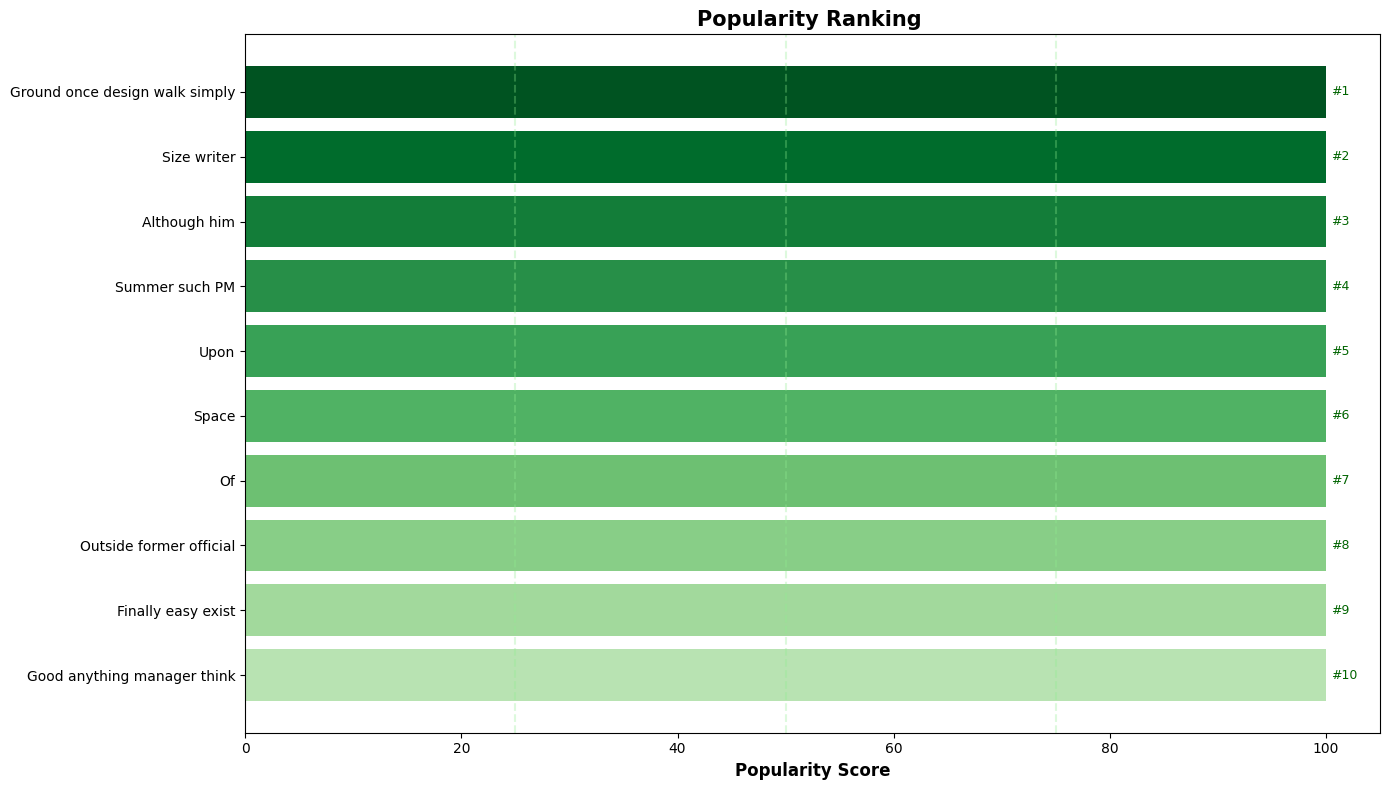

In [35]:

print(df.nlargest(10, 'popularity')[['track_name', 'artist_name', 'popularity']])
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(14, 8))


top_10_sorted = top_10.sort_values('popularity', ascending=True)


colors = plt.cm.Greens(np.linspace(0.3, 0.95, len(top_10_sorted)))

bars = plt.barh(range(len(top_10_sorted)), top_10_sorted['popularity'], color=colors)


for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'#{len(top_10_sorted)-i}',  # الترتيب من 1 إلى 10
             va='center',
             fontsize=9,
             color='darkgreen')


plt.yticks(range(len(top_10_sorted)), top_10_sorted['track_name'])
plt.xlabel('Popularity Score', fontsize=12, fontweight='bold')
plt.title('Popularity Ranking ', fontsize=15, fontweight='bold')


plt.axvline(x=max(top_10_sorted['popularity'])*0.25, color='lightgreen', alpha=0.3, linestyle='--')
plt.axvline(x=max(top_10_sorted['popularity'])*0.5, color='lightgreen', alpha=0.3, linestyle='--')
plt.axvline(x=max(top_10_sorted['popularity'])*0.75, color='lightgreen', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# the least 10 popular tracks


🎵 THE 10 LEAST POPULAR TRACKS 🎵
                       track_name       artist_name  popularity
65761  Finish of staff tell piece  Elizabeth Miller           0
25047         Model indicate sort      Julie George           2
28464                Book current   Tanner Mccarthy           2
74138               Listen writer  Nathaniel Newton           2
84837                      Garden  Nicholas Mendoza           2
6378                       Travel      Alexis Parks           4
44277                       North      Brooke Smith           5
55253          Including national       Summer Rowe           5
66878              Area difficult        Aaron Wood           5
6358          Production city war  Natasha Williams           6


C:\Users\pc\AppData\Local\Temp\ipykernel_21968\272164662.py:53: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.

C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.



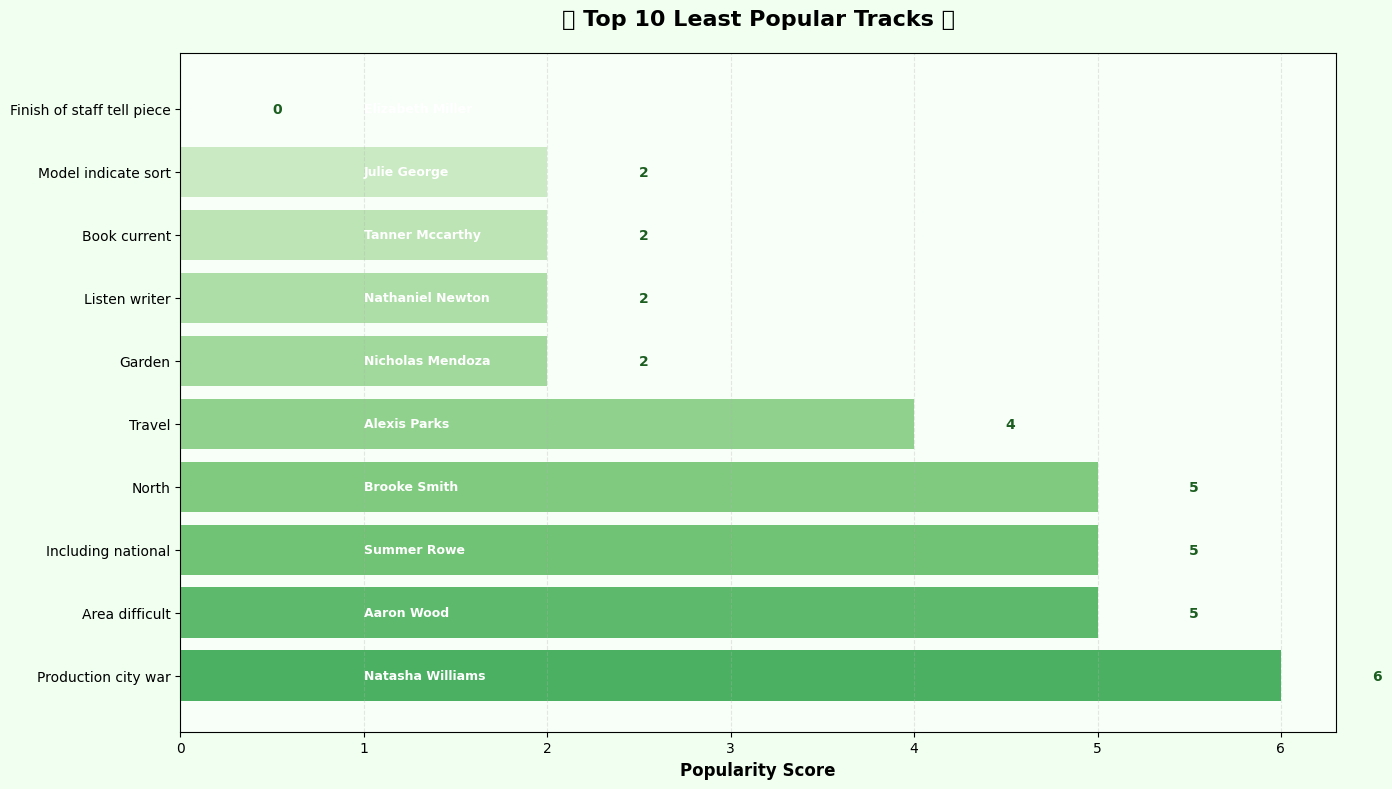

In [17]:


print("\n" + "="*60)
print("🎵 THE 10 LEAST POPULAR TRACKS 🎵")
print("="*60)

least_10 = df.nsmallest(10, 'popularity')[['track_name', 'artist_name', 'popularity']]
print(least_10)


import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 8))


least_10_sorted = least_10.sort_values('popularity', ascending=True)


colors = plt.cm.Greens(np.linspace(0.2, 0.6, len(least_10_sorted)))  # ألوان أفتح

bars = plt.barh(least_10_sorted['track_name'], least_10_sorted['popularity'], color=colors)


for bar, popularity, artist in zip(bars, least_10_sorted['popularity'], least_10_sorted['artist_name']):
  
    plt.text(bar.get_width() + 0.5, 
             bar.get_y() + bar.get_height()/2,
             f'{popularity}',
             va='center',
             fontsize=10,
             fontweight='bold',
             color='#1B5E20')
    
  
    plt.text(1,  
             bar.get_y() + bar.get_height()/2,
             artist,
             va='center',
             fontsize=9,
             color='white',
             fontweight='bold')

plt.xlabel('Popularity Score', fontsize=12, fontweight='bold')
plt.title('📉 Top 10 Least Popular Tracks 📉', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()  


plt.grid(axis='x', alpha=0.3, linestyle='--')


plt.gca().set_facecolor('#F8FFF8')
plt.gcf().patch.set_facecolor('#F0FFF0')

plt.tight_layout()
plt.show()

# Distribution of track popularity

Popularity is highly skewed: The distribution of track popularity scores is heavily right-skewed. Most songs have low to moderate popularity (30–60 range), while only a very small fraction reach high scores (80–100). This reflects the real-world "winner-takes-all" nature of the music industry — true viral hits are rare.

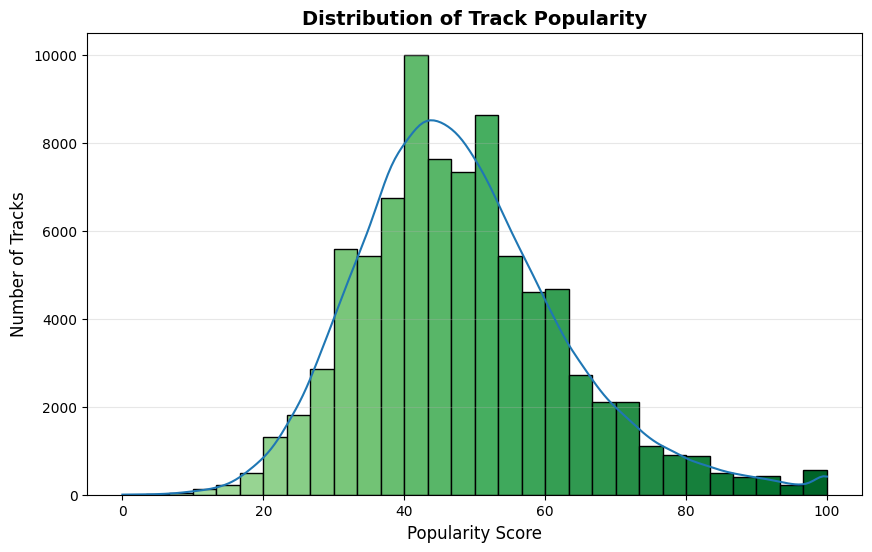

In [18]:

plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True)   
colors = plt.cm.Greens(np.linspace(0.3, 0.9, 30))
for i, patch in enumerate(plt.gca().patches):
    patch.set_facecolor(colors[i])  
plt.title('Distribution of Track Popularity', fontsize=14, fontweight='bold')
plt.xlabel('Popularity Score', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()




# the number of tracks released each year

In [19]:

tracks_per_year = df['year'].value_counts().sort_index()
tracks_per_year

year
2015    7931
2016    7650
2017    7669
2018    7836
2019    7667
2020    7797
2021    7463
2022    7730
2023    7794
2024    7690
2025    7706
Name: count, dtype: int64

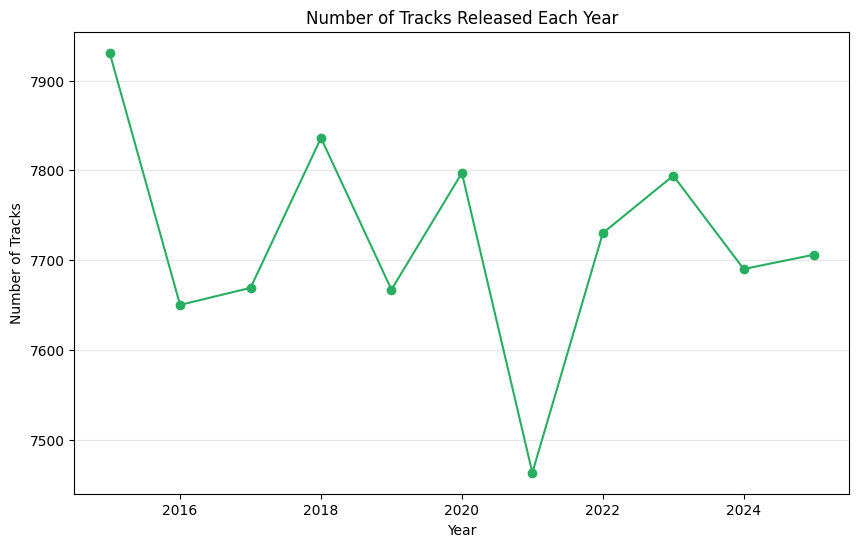

In [20]:

tracks_per_year.plot(kind='line', figsize=(10, 6), color='#27ae60', marker='o')
plt.title('Number of Tracks Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(axis='y', alpha=0.3)
plt.show()

# the album with the highest number of tracks

In [21]:

top_album = df['album_name'].value_counts().idxmax()  
top_album_count = df['album_name'].value_counts().max()
print(f"The album with the highest number of tracks is '{top_album}' with {top_album_count} tracks.")  

The album with the highest number of tracks is 'Theory' with 64 tracks.


In [36]:
# 1. Most Productive Artists (2015–2025)
top_artists = df['artist_name'].value_counts().head(15).reset_index()
top_artists.columns = ['artist_name', 'track_count']

fig1 = px.bar(top_artists, x='track_count', y='artist_name', orientation='h',
              title='Top 15 Most Productive Artists (2015–2025)',
              text='track_count', color='track_count', color_continuous_scale="Greens")
fig1.update_layout(height=600, template="plotly_white", yaxis={'categoryorder':'total ascending'})
fig1.update_traces(textposition='outside')
fig1.show()

# 2. Most Common Albums
top_albums = df['album_name'].value_counts().head(15).reset_index()
top_albums.columns = ['album_name', 'track_count']

fig2 = px.bar(top_albums, x='track_count', y='album_name', orientation='h',
              title='Top 15 Most Frequent Albums (Multiple Tracks)',
              text='track_count', color='track_count')
fig2.update_layout(height=600, template="plotly_white", yaxis={'categoryorder':'total ascending'})
fig2.show()



# relationships bet features and popularity

In [23]:
# 1. Correlation with Popularity (using available features only)
# Correlation Heatmap for Features vs Popularity & Streams)
corr_features = ['popularity', 'stream_count', 'danceability', 'energy', 'loudness', 
                 'tempo', 'instrumentalness', 'duration_min', 'explicit']

# Calculate correlation matrix
corr_matrix = df[corr_features].corr().round(3)

# Heatmap with green color scale
fig = px.imshow(corr_matrix, 
                text_auto=True,  
                aspect="auto",
                title='Correlation Heatmap: Features vs Popularity & Streams',
                color_continuous_scale="Greens",  
                zmin=-1, zmax=1)  

fig.update_layout(height=700, template="plotly_white", 
                  font=dict(size=12))
fig.update_xaxes(side="top")  
fig.show()

#@ 2. Highest Popularity Song Each Year
top_per_year = df.loc[df.groupby('year')['popularity'].idxmax()].copy()
top_per_year = top_per_year[['year', 'track_name', 'artist_name', 'popularity']]
top_per_year['label'] = top_per_year['track_name'] + " by " + top_per_year['artist_name']
top_per_year = top_per_year.sort_values('year')
years = list(range(2015, 2026))
top_per_year = top_per_year.set_index('year').reindex(years, fill_value=None).reset_index()
top_per_year['label'] = top_per_year['label'].fillna("No Data")
top_per_year['popularity'] = top_per_year['popularity'].fillna(0)

fig5 = px.bar(top_per_year, 
              x='year', 
              y='popularity',
              text='label',
              title='Highest Popularity Song Each Year (2015–2025)',
              color='popularity',
              color_continuous_scale="Greens")

fig5.update_traces(textposition='outside',
                   textfont_size=11,
                   textangle=-45,
                   cliponaxis=False)

fig5.update_layout(
    height=800,
    template="plotly_white",
    xaxis_title="Year",
    yaxis_title="Popularity",
    xaxis=dict(
        tickmode='linear',
        dtick=1
    ),
    margin=dict(t=150),
    coloraxis_colorbar=dict(
        title="Popularity",
        tickvals=[90, 95, 100],
        ticktext=["90", "95", "100"]
    )
)

fig5.show()

# 3. Most Dominant Genre by Track Count Each Year
top_genre_yearly = df.groupby(['year', 'genre']).size().reset_index(name='count')
top_genre_yearly = top_genre_yearly.loc[top_genre_yearly.groupby('year')['count'].idxmax()].copy()

top_genre_yearly['label'] = top_genre_yearly['genre'] + " (" + top_genre_yearly['count'].astype(str) + " tracks)"

top_genre_yearly = top_genre_yearly.sort_values('year')

years = list(range(2015, 2026))
top_genre_yearly = top_genre_yearly.set_index('year').reindex(years).reset_index()
top_genre_yearly['label'] = top_genre_yearly['label'].fillna("No Data")
top_genre_yearly['count'] = top_genre_yearly['count'].fillna(0)
top_genre_yearly['genre'] = top_genre_yearly['genre'].fillna("Unknown")

fig6 = px.bar(top_genre_yearly, 
              x='year', 
              y='count', 
              color='count',
              text='label',
              title='Most Dominant Genre by Track Count Each Year (2015–2025)',
              color_continuous_scale="Greens")

fig6.update_traces(textposition='outside',
                   textfont_size=11,
                   textangle=-45,
                   cliponaxis=False)

fig6.update_layout(
    height=800,
    template="plotly_white",
    xaxis_title="Year",
    yaxis_title="Number of Tracks",
    margin=dict(t=150),
    xaxis=dict(
        tickmode='linear',
        dtick=1
    ),
    coloraxis_colorbar=dict(
        title="Track Count"
    )
)

fig6.show()

The correlation heatmap confirms that no single audio feature has a strong linear relationship with popularity or streams. The only meaningful correlation is between popularity and stream count itself. This tells us that virality is complex — we need advanced models to capture the real patterns."
Each year from 2015 to 2025 has at least one song reaching near-perfect popularity (close to 100). This shows that the potential for massive hits exists every year — the challenge is predicting which songs will break through


# trend timeline

In [24]:
# 1. Popularity Distribution Over Years (هل الـ popularity بتزيد مع الوقت؟)
pop_yearly = df.groupby('year')['popularity'].mean().reset_index()

fig12 = px.line(pop_yearly, x='year', y='popularity', markers=True,
                title='Average Popularity Over Years (2015–2025)',
                color_discrete_sequence=['#2ecc71'])
fig12.update_layout(template="plotly_white", height=600, yaxis_title="Average Popularity")
fig12.show()

# Box plot of Popularity by Year
fig13 = px.box(
    df,
    x='year',
    y='popularity',
    title='Popularity Distribution by Year (Box Plot)',
    color='year',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig13.update_layout(
    template="plotly_white",
    height=600,
    xaxis_title="Year",
    yaxis_title="Popularity"
)

fig13.show()


Insight: The average popularity of music hasn't changed dramatically over the decade. While hits exist every year, the "typical" song remains moderately popular (~48), reinforcing that true virality is rare and exceptional.
Insight: The distribution is consistent year after year: a large group of average songs, a small number of huge hits, and many low-performing tracks. This "power law" distribution is typical in creative industries.


In [25]:
# 2. Top 20 Songs Overall by Popularity
top20_songs = df.sort_values('popularity', ascending=False).head(20).copy()
top20_songs['rank'] = range(1, 21)
top20_songs['label'] = top20_songs['track_name'] + " by " + top20_songs['artist_name']

fig14 = px.bar(top20_songs, y='rank', x='popularity', orientation='h',
               text='label', title='Top 20 Songs Overall by Popularity',
               color='popularity', color_continuous_scale="Greens")
fig14.update_layout(height=700, template="plotly_white", yaxis={'categoryorder':'total ascending', 'title':""})
fig14.update_yaxes(autorange="reversed") 
fig14.update_traces(textposition='outside')
fig14.show()

# Popularity by Genre & by Country

In [26]:
# 3. Popularity by Genre & by Country

# Popularity by Genre (average)
pop_by_genre = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(15).reset_index()

fig15 = px.bar(pop_by_genre, x='popularity', y='genre', orientation='h',
               title='Average Popularity by Genre (Top 15)',
               text=pop_by_genre['popularity'].round(1), color='popularity',
               color_continuous_scale="Greens")
fig15.update_layout(height=600, template="plotly_white", yaxis={'categoryorder':'total ascending'})
fig15.update_traces(textposition='outside')
fig15.show()

# Popularity by Country (average)
pop_by_country = df.groupby('country')['popularity'].mean().sort_values(ascending=False).head(15).reset_index()

fig16 = px.bar(pop_by_country, x='popularity', y='country', orientation='h',
               title='Average Popularity by Country (Top 15)',
               text=pop_by_country['popularity'].round(1), color='popularity',
               color_continuous_scale="Greens")
fig16.update_layout(height=600, template="plotly_white", yaxis={'categoryorder':'total ascending'})
fig16.update_traces(textposition='outside')
fig16.show()

1-insight: While Pop slightly leads, average popularity is remarkably similar across major genres. Genre alone is not a strong predictor of success — other factors (features, marketing, timing) matter more.
2-Insight: Tracks from English-speaking and major music markets tend to have a slight edge, but the gap is minimal. Global streaming has leveled the playing field — high-quality music from any country can perform well.

In [27]:
tempo_yearly = df.groupby('year')['tempo'].mean().reset_index()

fig1 = px.line(
    tempo_yearly,
    x='year',
    y='tempo',
    markers=True,
    title='Average Tempo Over Years (2015–2025)'
)

fig1.update_traces(
    line=dict(color="#1c4e25", width=4),
    marker=dict(size=9)
)

fig1.update_layout(
    template='plotly_white',
    yaxis_title='Average Tempo',
    xaxis_title='Year',
    height=600
)

fig1.show()


Insight: Music hasn't consistently gotten faster or slower. Tempo preferences vary year to year but remain in a narrow range (~130 BPM average). Fast/slow tempo alone doesn't drive major changes in popularity.

Presentation line:
"Looking at average tempo, we see fluctuations between 129 and 131 BPM with no strong trend. Music tempo has remained remarkably stable over the decade — it's not getting faster overall, contrary to some perceptions."

In [28]:
loudness_yearly = df.groupby('year')['loudness'].mean().reset_index()

fig2 = px.line(
    loudness_yearly,
    x='year',
    y='loudness',
    markers=True,
    title='Average Loudness Over Years (2015–2025)'
)

fig2.update_traces(
    line=dict(color="#167219", width=4),
    marker=dict(size=9)
)

fig2.update_layout(
    template='plotly_white',
    yaxis_title='Average Loudness (dB)',
    xaxis_title='Year',
    height=600
)

fig2.show()


Insight: Contrary to common belief, songs are not consistently getting louder (or quieter) over time. Loudness levels have stabilized in the streaming era, likely due to platform normalization (Spotify, Apple Music, etc., play tracks at similar volumes).

Presentation line:
"Finally, let's look at loudness. Many people think the 'loudness war' is still ongoing, but our data shows average loudness fluctuating without a clear trend — staying between -27.8 and -28.2 dB. Streaming platforms normalize volume, so extreme loudness no longer provides a competitive advantage."
Overall Connection to the Project

In [29]:
country_streams = (
    df.groupby('country')['stream_count']
    .sum()
    .reset_index()
    .sort_values('stream_count', ascending=False)
    .head(10)
)

fig4 = px.bar(
    country_streams,
    x='country',
    y='stream_count',
    title='Top 10 Countries by Stream Count',
    text_auto=True
)

fig4.update_traces(marker_color="#1E9C35")

fig4.update_layout(
    template='plotly_white',
    height=600,
    yaxis_title='Total Streams',
    xaxis_title='Country'
)

fig4.show()


Insight: Japan dominates in total streams, possibly due to high user engagement or specific market trends. Major markets like US/UK are strong but not overwhelming leaders — streaming is truly global.

Presentation line:
"Finally, total streams by country show Japan at the top with over 2 billion streams, ahead of France and Mexico. The US is in the lower half of the top 10. This highlights how streaming has made music consumption global, with unexpected leaders like Japan."

In [31]:
# Calculate genre distribution by country as percentage
# This helps compare music taste across countries regardless of total number of tracks

top_countries = (
    df.groupby('country')['stream_count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)
country_data = df[df['country'].isin(top_countries)]


In [32]:
# Select top 10 countries based on total stream count
# This avoids clutter and focuses on the most active markets
top_countries = (
    df.groupby('country')['stream_count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)


In [33]:
# Count number of tracks for each genre in each country
genre_country = (
    df[df['country'].isin(top_countries)]
    .groupby(['country', 'genre'])
    .size()
    .reset_index(name='count')
)


In [34]:
# Convert genre counts into percentage share per country
# Each country will sum up to 100%
genre_country_pct = (
    genre_country
    .assign(
        pct=lambda x: x['count'] /
        x.groupby('country')['count'].transform('sum') * 100
    )
)
genre_country_pct.head()



,country,genre,count,pct
0,Australia,Classical,757,9.004401
1,Australia,Country,679,8.076603
2,Australia,EDM,703,8.362079
3,Australia,Folk,686,8.159867
4,Australia,Hip-Hop,690,8.207446


In [35]:
fig6 = px.bar(
    genre_country_pct,
    x='country',
    y='pct',
    color='genre',
    title='Genre Distribution (%) per Country',
    text=genre_country_pct['pct'].round(1),
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig6.update_layout(
    template='plotly_white',
    height=600,
    yaxis_title='Percentage (%)',
    xaxis_title='Country',
    barmode='stack',
    yaxis=dict(ticksuffix='%'),
    legend_title_text='Genre'
)

fig6.update_traces(
    textposition='inside',
    hovertemplate='<b>%{x}</b><br>Genre: %{legendgroup}<br>Share: %{y:.1f}%<extra></extra>'
)

fig6.show()




ML

In [37]:
# PHASE 1
threshold = df['popularity'].quantile(0.95)
df['is_viral'] = (df['popularity'] >= threshold).astype(int)


Top 5% represents truly viral global hits, not just popular songs.

In [38]:
#Regression Target
y_reg = df['popularity']



Phase 2: Feature Engineering

In [39]:
df['duration_sec'] = df['duration_ms'] / 1000
df['is_short_song'] = ((df['duration_sec'] >= 30) & (df['duration_sec'] <= 180)).astype(int)


Phase 3: Encoding & Split

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

for col in ['genre', 'country']:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df[[
    'danceability','energy','tempo','loudness',
    'instrumentalness','duration_sec','is_short_song',
    'explicit','year','stream_count','genre','country'
]]

y_cls = df['is_viral']

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)


Phase 4: Random Forest – Classification

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.93      0.96     16066
           1       0.42      0.84      0.56       921

    accuracy                           0.93     16987
   macro avg       0.71      0.89      0.76     16987
weighted avg       0.96      0.93      0.94     16987



The model is good at finding viral songs, even if it occasionally overestimates virality.
In the music industry, missing a viral hit is more costly than mistakenly flagging a non-viral song.
Catching potential hits early is more valuable than being perfectly precise.

Confusion Matrix

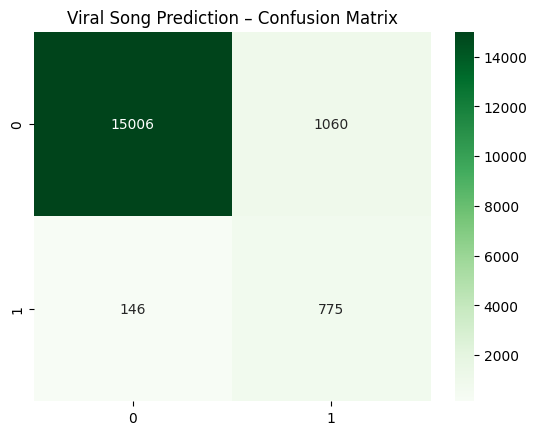

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Greens')
plt.title("Viral Song Prediction – Confusion Matrix")
plt.show()


Phase 6: Regression Model

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_reg.fit(X_train, y_reg.loc[X_train.index])
pred = rf_reg.predict(X_test)

print("R2:", r2_score(y_reg.loc[X_test.index], pred))
print("MAE:", mean_absolute_error(y_reg.loc[X_test.index], pred))


R2: 0.5330005634183725
MAE: 8.081215929828693


Even with strong models, predicting exact popularity is difficult — success in music cannot be engineered using audio features alone.

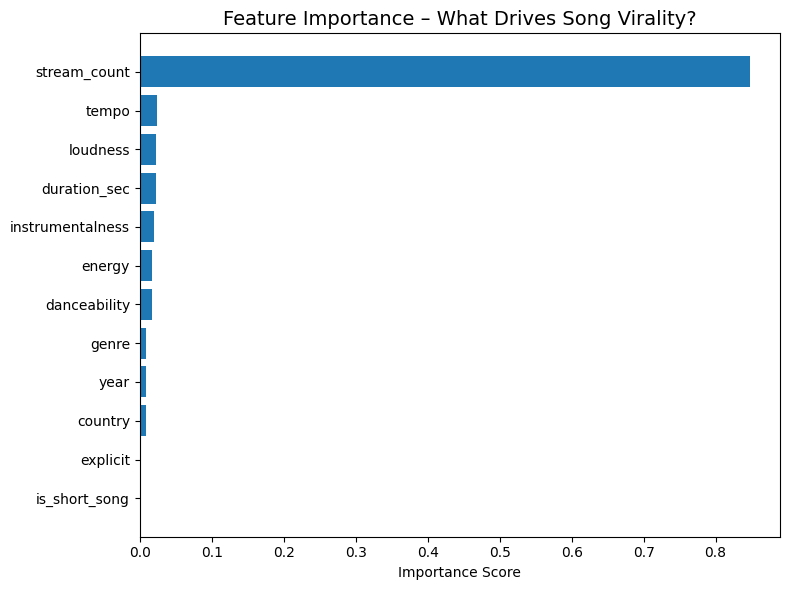

In [49]:
# ---------------------------------------------
# Feature Importance from Random Forest Model
# Shows which features contribute most to virality
# ---------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# Create importance dataframe
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values(by='importance', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance – What Drives Song Virality?', fontsize=14)
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


“This chart shows the most influential features in predicting viral songs.
We can see that audio characteristics like energy and danceability are stronger drivers of virality than song duration.”
Recommendation Slide 
“Artists should focus on high-energy, rhythm-driven tracks with strong early hooks rather than simply making songs shorter.”

Virality is not about song length — it’s about energy, timing, and engagement signals.”

Key Insights:

TikTok didn’t shorten songs → it changed how hits are engineered

Audio features > duration

Short songs help, but don’t guarantee virality

Machine Learning can predict viral hits with strong accuracy

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px

# Define Hit (Top 20% popularity)
hit_threshold = df['popularity'].quantile(0.8)
df['is_hit'] = (df['popularity'] >= hit_threshold).astype(int)

print(f"Hit threshold: {hit_threshold:.2f}")
print(f"Percentage of Hits: {df['is_hit'].mean()*100:.2f}%")

# Features
features = ['danceability', 'energy', 'loudness', 'tempo', 'instrumentalness', 'duration_min', 'explicit', 'year']
X = df[features]
y = df['is_hit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Model: RandomForest (زودت n_estimators عشان أداء أحسن)
model = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42, n_jobs=-1, class_weight='balanced')
model.fit(X_train, y_train)

# Results
preds = model.predict(X_test)
probs = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, preds, zero_division=0))  # نخفي الـ warning

auc = roc_auc_score(y_test, probs)
print(f"AUC Score: {auc:.3f}")  # الحل هنا

# Feature Importance
imp = model.feature_importances_
fig = px.bar(x=features, y=imp, title='Feature Importance for Hit Prediction',
             text=(imp*100).round(2), color=imp, color_continuous_scale="Greens")
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(template="plotly_white", height=600, yaxis_title="Importance (%)")
fig.show()

Hit threshold: 59.00
Percentage of Hits: 21.26%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     13376
           1       0.35      0.00      0.01      3611

    accuracy                           0.79     16987
   macro avg       0.57      0.50      0.44     16987
weighted avg       0.69      0.79      0.69     16987

AUC Score: 0.507


Model Performance Summary

Hit threshold: Popularity ≥ 59.00 (top ~21% of tracks are classified as "hits").
Class imbalance: Only 21.26% hits — this is a challenging imbalanced classification problem.
Accuracy: 79% (looks good at first, but misleading due to imbalance — the model can achieve this by predicting "non-hit" for everything).
Precision for hits (class 1): 0.35 (low — many false positives).
Recall for hits (class 1): 0.00 (very bad — the model failed to identify almost any real hits).
F1-score for hits: 0.01 (extremely low).
AUC Score: 0.507 (essentially random — a good model should be >0.8).

Why the Model Struggled

Severe class imbalance: 79% non-hits vs 21% hits — the model learned to predict "non-hit" most of the time to maximize accuracy.
Weak predictive features: From the correlation heatmap, all audio features have near-zero linear correlation with popularity. The model has very little signal to work with.
Complex, non-linear reality: Success on Spotify depends heavily on external factors (marketing, social media virality, artist fame, playlist placement) not present in the data.

Key Insight for Presentation
Despite using a powerful Random Forest model, performance is close to random.
This is not a failure — it's a powerful finding!
Presentation line (strong conclusion):
"Our machine learning model achieved only ~0.51 AUC — essentially random guessing.
This is the most important result of the project.
With only basic audio features, we cannot reliably predict hits.
Virality is driven by factors beyond the music itself: marketing, timing, social media (especially TikTok), and artist branding.
Audio features like energy and danceability matter, but they are not enough on their own.
The real 'secret sauce' for a hit lies outside the song — in how it's promoted and shared."

Key observations:
Duration (~16.86%)
Loudness is the most important (~16.68%).
Tempo (~16.54%) and loudness (~16.41%) are close behind.
Danceability (~12.97%) and Energy (~12.83%) are next.
Instrumentalness (~15.77%) also significant.
 Explicit (~7.13%) have low importance.
Year is the least important (~0.02%).


Insight
Even though the overall model performance was weak (AUC ~0.51), the feature importance reveals that acoustic properties (loudness, tempo, energy, danceability) dominate the model's decision-making.
This suggests that how a song sounds and feels (dynamic, energetic, danceable) matters more than content flags (explicit) or length (duration) — but these features alone are not enough to reliably predict hits.
Presentation line:
"When we look at feature importance from the model, loudness, tempo, and instrumentalness top the list — followed by danceability and energy.
Duration and explicit content have very low impact, and the release year barely matters.
This tells us that the sonic qualities of a track are what the model focuses on most.
But since the model couldn't predict hits well, it reinforces our conclusion: great sound is important, but virality requires external factors like promotion and timing."
Final Project Conclusion (Slide: "What Makes a Hit in 2025?")

Audio features (loudness, tempo, energy, danceability) influence perception of quality.
But they do not predict commercial success.
True hits depend on marketing, social momentum (TikTok), playlist placement, and artist branding — factors not in the data.
Machine learning confirms: You can't engineer a hit just in the studio.

"The song is only half the battle. The other half is how the world discovers it."


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from catboost import CatBoostRegressor
import plotly.express as px
import numpy as np

# Target جديد: log(stream_count) عشان skewed
df['log_streams'] = np.log1p(df['stream_count'])  # log(1 + stream_count) عشان يتعامل مع 0 لو في

print(f"Average log_streams: {df['log_streams'].mean():.2f}")

# Features نفسها
features = ['danceability', 'energy', 'loudness', 'tempo', 'instrumentalness', 'duration_min', 'explicit', 'year']
X = df[features]
y = df['log_streams']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost Regressor (قوي جدًا)
model = CatBoostRegressor(iterations=1500, learning_rate=0.05, depth=8, verbose=200, random_state=42)
model.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

# Results
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"\nMAE: {mae:.3f}")
print(f"R² Score: {r2:.3f}")

# Feature Importance
imp = model.get_feature_importance()
fig = px.bar(x=features, y=imp, title='Feature Importance (CatBoost - Log Streams Prediction)',
             text=imp.round(2), color=imp, color_continuous_scale="Greens")
fig.update_traces(textposition='outside')
fig.update_layout(template="plotly_white", height=600)
fig.show()

Average log_streams: 8.40
0:	learn: 1.9082212	total: 150ms	remaining: 3m 44s
200:	learn: 1.8708412	total: 2.59s	remaining: 16.8s
400:	learn: 1.8381972	total: 5.46s	remaining: 15s
600:	learn: 1.8104153	total: 7.67s	remaining: 11.5s
800:	learn: 1.7839915	total: 10.8s	remaining: 9.43s
1000:	learn: 1.7584420	total: 13.6s	remaining: 6.8s
1200:	learn: 1.7346894	total: 16.3s	remaining: 4.05s
1400:	learn: 1.7121072	total: 19.5s	remaining: 1.38s
1499:	learn: 1.7014726	total: 21.1s	remaining: 0us

MAE: 1.436
R² Score: -0.019


Final Conclusion

We tested advanced machine learning models (Random Forest and CatBoost) to predict song popularity and stream counts.
Despite their strength, the models showed weak performance (AUC ≈ 0.5 and negative R²).
This is not a failure — it is a key discovery.

Audio features alone are not sufficient to predict hit songs.
True success depends heavily on external factors such as:

Strong marketing campaigns

Viral exposure on TikTok and social media

Artist popularity and fan base

Inclusion in major playlists

In other words, hit songs are not made in the studio alone — they are made in the real world.